In [1]:
# 1. open individual file
# 2. iterate over days and update min close price, max close price, max and max difference
# 3. for each new day that has a lower min start calculating the max difference again
# 4. if max difference is ever larger than the previous, save that instead
# 5. Now you have this for one stock, do it for all the stocks!!!!

import pandas as pd
import numpy as np
import time
import json
import random
import requests
import os
import datetime
import time
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

import plotly
import  plotly.plotly as py
import plotly.graph_objs as go

#read in the first file
#input_folder = os.path.join("..","Data","Test_stock")
input_folder = os.path.join("..","Data","Stocks")
output_file = os.path.join("Combined Stock Data.csv")

plotly.tools.set_credentials_file(username='klinga88', api_key='r4j4H1eCCeIYTpmYRxx5')
plotly.tools.set_config_file(world_readable=True)

In [2]:
#function: Determines the largest difference between close prices given a stock's daily historical dataframe
#input: historical daily stock data in the form of a pandas dataframe
#output: Largest difference between two close prices, minimum close date, minimum close price,maximum close date,
#        maximum close price

def maxChange(data_df):
    min_close = data_df.iloc[0,4] #initiliaze first close price in the list
    min_date = data_df.iloc[0,0] #initiliaze first close price in the list
    max_close = None
    max_date = None
    biggest_diff = data_df.iloc[1,4] - data_df.iloc[0,4] # initialize to the price difference from first day to second in list

    for index, row in data_df.iterrows():
        if (row["Close"] <= min_close):  
            min_close = row["Close"]
            min_date = row["Date"]
        elif (row["Close"] - min_close) > biggest_diff:
            biggest_diff = row["Close"] - min_close
            max_close = row["Close"]
            max_date = row["Date"]

    #print(f"Biggest Change: {biggest_diff}, from:{min_date} to {max_date}")
    
    return biggest_diff, min_date, min_close, max_date, max_close

In [5]:
def maxChange_1(data_df):
    min_close_row = data_df.iloc[0,:]
    #get index of max element in close column of data frame
    max_close_index = data_df['Close'].idxmax()
    max_close_row =  data_df.loc[data_df['Close'].idxmax()]
    
    for index, row in data_df.iterrows():
        if index >= max_close_index:
            break
        elif row['Close'] < min_close_row["Close"]:
            min_close_row = row
            
    return min_close_row,max_close_row    
    

In [6]:
counter=0
for filename in os.listdir(input_folder):
    try:
        ticker = filename.split(".")[0]
        input_file = os.path.join(input_folder,filename)
        data_df = pd.read_csv(input_file)
        min_close_row,max_close_row = maxChange_1(data_df)
        print(f"MIN: {min_close_row} MAX: {max_close_row}")
    except Exception as e: 
        print(e)   
    counter +=1
    print(f'counter: {counter}')

MIN: Date       1999-11-23
Open           28.688
High           29.446
Low            27.002
Close          27.002
Volume        6332082
OpenInt             0
Name: 3, dtype: object MAX: Date       2000-03-06
Open           76.278
High           109.37
Low            75.945
Close          107.32
Volume        6033135
OpenInt             0
Name: 73, dtype: object
counter: 1
MIN: Date       1971-11-10
Open           1.3157
High           1.3157
Low            1.2328
Close          1.2528
Volume        1200045
OpenInt             0
Name: 470, dtype: object MAX: Date       2007-07-13
Open           98.046
High            99.57
Low            96.275
Close          98.864
Volume       20312951
OpenInt             0
Name: 9470, dtype: object
counter: 2
MIN: Date       2016-12-22
Open            24.12
High            24.92
Low              23.5
Close           23.72
Volume         375597
OpenInt             0
Name: 281, dtype: object MAX: Date       2017-11-01
Open               81
High       

MIN: Date       1995-08-10
Open           2.3281
High           2.3281
Low            2.2414
Close          2.2689
Volume          92366
OpenInt             0
Name: 89, dtype: object MAX: Date       2015-04-24
Open           110.77
High            111.6
Low            109.87
Close          111.14
Volume         883678
OpenInt             0
Name: 5046, dtype: object
counter: 24
MIN: Date       2009-03-05
Open            3.955
High            3.955
Low            3.2748
Close          3.4593
Volume          53527
OpenInt             0
Name: 1012, dtype: object MAX: Date       2017-10-10
Open             49.9
High           51.275
Low            49.855
Close           51.05
Volume         285106
OpenInt             0
Name: 3177, dtype: object
counter: 25
MIN: Date       2012-11-07
Open             0.75
High             0.85
Low              0.63
Close            0.63
Volume          31651
OpenInt             0
Name: 727, dtype: object MAX: Date       2017-11-10
Open             6.24
High 

MIN: Date       1985-03-08
Open           0.5308
High           0.5308
Low           0.46678
Close         0.46678
Volume         264323
OpenInt             0
Name: 23, dtype: object MAX: Date       2011-04-21
Open           50.675
High           51.132
Low            50.335
Close          51.032
Volume        6818603
OpenInt             0
Name: 6603, dtype: object
counter: 47
MIN: Date       2014-06-17
Open           31.581
High           31.868
Low            30.776
Close          31.607
Volume        1269227
OpenInt             0
Name: 2, dtype: object MAX: Date       2014-07-16
Open            34.36
High           35.122
Low            34.266
Close          34.968
Volume         861505
OpenInt             0
Name: 22, dtype: object
counter: 48
MIN: Date       2016-02-05
Open           25.066
High           25.749
Low            25.066
Close          25.066
Volume          18767
OpenInt             0
Name: 44, dtype: object MAX: Date       2017-03-16
Open           38.685
High       

MIN: Date       2012-06-25
Open            14.64
High            15.03
Low             14.63
Close           14.91
Volume         780014
OpenInt             0
Name: 1292, dtype: object MAX: Date       2016-12-08
Open            39.21
High          40.5499
Low             39.05
Close           40.13
Volume        2220668
OpenInt             0
Name: 2414, dtype: object
counter: 70
MIN: Date       2017-11-03
Open             8.17
High           8.4839
Low              5.87
Close            6.05
Volume         523518
OpenInt             0
Name: 0, dtype: object MAX: Date       2017-11-03
Open             8.17
High           8.4839
Low              5.87
Close            6.05
Volume         523518
OpenInt             0
Name: 0, dtype: object
counter: 71
MIN: Date       2005-04-27
Open           18.008
High           18.373
Low            17.871
Close          18.236
Volume        4570163
OpenInt             0
Name: 42, dtype: object MAX: Date       2017-11-08
Open           143.76
High      

MIN: Date       1990-11-01
Open           0.7795
High            0.796
Low            0.7795
Close          0.7795
Volume         181624
OpenInt             0
Name: 1590, dtype: object MAX: Date       2017-11-06
Open            92.42
High            92.96
Low             91.65
Close           92.28
Volume        1530934
OpenInt             0
Name: 8393, dtype: object
counter: 93
MIN: Date       1984-07-24
Open           2.0243
High           2.0243
Low            1.9478
Close          1.9647
Volume         211091
OpenInt             0
Name: 329, dtype: object MAX: Date       2015-05-27
Open            48.78
High           49.779
Low            48.676
Close          49.725
Volume        4315047
OpenInt             0
Name: 8103, dtype: object
counter: 94
MIN: Date       2014-11-21
Open            11.75
High               12
Low                11
Close           11.76
Volume           8550
OpenInt             0
Name: 8, dtype: object MAX: Date       2014-11-25
Open            11.65
High  

KeyboardInterrupt: 

In [6]:
combined_ticker = []
combined_biggest_diff = []
combined_min_date = []
combined_min_close = []
combined_max_date = []
combined_max_close = []
counter = 0
#Iterate over each stock in the input folder
for filename in os.listdir(input_folder):
    try:
        ticker = filename.split(".")[0]
        input_file = os.path.join(input_folder,filename)
        data_df = pd.read_csv(input_file)
        biggest_diff, min_date, min_close, max_date, max_close = maxChange(data_df)
        combined_ticker.append(ticker)
        combined_biggest_diff.append(biggest_diff)
        combined_min_date.append(min_date)
        combined_min_close.append(min_close)
        combined_max_date.append(max_date)
        combined_max_close.append(max_close)
    except:
        print(f"Could not retrieve {filename}")
    counter +=1
    print(f'counter: {counter}')
combined_df = pd.DataFrame({"Ticker":combined_ticker,
                           "Biggest Difference":combined_biggest_diff,
                           "Minimum Close Date":combined_min_date,
                           "Minimum Close":combined_min_close,
                           "Maximum Close Date":combined_max_date,
                           "Maximum Close":combined_max_close})


counter: 1
counter: 2
counter: 3
counter: 4
counter: 5
counter: 6
counter: 7
counter: 8
counter: 9
counter: 10
counter: 11
counter: 12
counter: 13
counter: 14
counter: 15
counter: 16
counter: 17
counter: 18
counter: 19
counter: 20
counter: 21
counter: 22
counter: 23
counter: 24
counter: 25
counter: 26
counter: 27
counter: 28
counter: 29
counter: 30
counter: 31
counter: 32
counter: 33
counter: 34
counter: 35
counter: 36
counter: 37
counter: 38
counter: 39
counter: 40
counter: 41
counter: 42
counter: 43
counter: 44
counter: 45
counter: 46
counter: 47
counter: 48
counter: 49
counter: 50
counter: 51
counter: 52
counter: 53
Could not retrieve accp.us.txt
counter: 54
counter: 55
counter: 56
counter: 57
counter: 58
counter: 59
counter: 60
counter: 61
counter: 62
counter: 63
counter: 64
counter: 65
counter: 66
counter: 67
counter: 68
counter: 69
counter: 70
counter: 71
counter: 72
counter: 73
counter: 74
counter: 75
counter: 76
counter: 77
counter: 78
counter: 79
counter: 80
counter: 81
counte

counter: 631
counter: 632
counter: 633
counter: 634
counter: 635
counter: 636
counter: 637
counter: 638
counter: 639
Could not retrieve band.us.txt
counter: 640
counter: 641
counter: 642
counter: 643
counter: 644
counter: 645
counter: 646
counter: 647
counter: 648
counter: 649
counter: 650
counter: 651
counter: 652
counter: 653
counter: 654
counter: 655
counter: 656
counter: 657
counter: 658
counter: 659
counter: 660
counter: 661
counter: 662
counter: 663
counter: 664
Could not retrieve bbrx.us.txt
counter: 665
counter: 666
counter: 667
counter: 668
counter: 669
counter: 670
counter: 671
counter: 672
counter: 673
counter: 674
counter: 675
counter: 676
counter: 677
counter: 678
counter: 679
counter: 680
counter: 681
counter: 682
counter: 683
counter: 684
counter: 685
counter: 686
counter: 687
counter: 688
counter: 689
counter: 690
counter: 691
counter: 692
counter: 693
counter: 694
counter: 695
counter: 696
counter: 697
counter: 698
counter: 699
counter: 700
counter: 701
counter: 702
co

counter: 1233
counter: 1234
counter: 1235
counter: 1236
counter: 1237
counter: 1238
counter: 1239
counter: 1240
counter: 1241
counter: 1242
counter: 1243
counter: 1244
counter: 1245
counter: 1246
counter: 1247
counter: 1248
counter: 1249
counter: 1250
counter: 1251
counter: 1252
counter: 1253
counter: 1254
counter: 1255
counter: 1256
counter: 1257
counter: 1258
counter: 1259
counter: 1260
counter: 1261
counter: 1262
counter: 1263
counter: 1264
counter: 1265
counter: 1266
counter: 1267
counter: 1268
counter: 1269
counter: 1270
counter: 1271
counter: 1272
counter: 1273
counter: 1274
counter: 1275
counter: 1276
counter: 1277
counter: 1278
counter: 1279
counter: 1280
counter: 1281
counter: 1282
counter: 1283
counter: 1284
counter: 1285
counter: 1286
counter: 1287
counter: 1288
counter: 1289
counter: 1290
counter: 1291
counter: 1292
counter: 1293
counter: 1294
counter: 1295
counter: 1296
counter: 1297
counter: 1298
counter: 1299
counter: 1300
counter: 1301
counter: 1302
counter: 1303
counte

counter: 1821
counter: 1822
counter: 1823
counter: 1824
counter: 1825
counter: 1826
counter: 1827
counter: 1828
counter: 1829
counter: 1830
counter: 1831
counter: 1832
counter: 1833
counter: 1834
counter: 1835
counter: 1836
counter: 1837
counter: 1838
counter: 1839
counter: 1840
counter: 1841
counter: 1842
counter: 1843
counter: 1844
counter: 1845
counter: 1846
counter: 1847
counter: 1848
counter: 1849
counter: 1850
counter: 1851
counter: 1852
counter: 1853
counter: 1854
counter: 1855
counter: 1856
counter: 1857
counter: 1858
counter: 1859
counter: 1860
counter: 1861
counter: 1862
counter: 1863
counter: 1864
counter: 1865
counter: 1866
counter: 1867
counter: 1868
counter: 1869
counter: 1870
counter: 1871
counter: 1872
counter: 1873
counter: 1874
counter: 1875
counter: 1876
counter: 1877
counter: 1878
counter: 1879
counter: 1880
counter: 1881
counter: 1882
counter: 1883
counter: 1884
counter: 1885
counter: 1886
counter: 1887
counter: 1888
counter: 1889
counter: 1890
counter: 1891
counte

counter: 2403
counter: 2404
counter: 2405
counter: 2406
counter: 2407
counter: 2408
counter: 2409
counter: 2410
counter: 2411
counter: 2412
counter: 2413
counter: 2414
counter: 2415
counter: 2416
counter: 2417
counter: 2418
counter: 2419
counter: 2420
counter: 2421
counter: 2422
counter: 2423
counter: 2424
counter: 2425
counter: 2426
counter: 2427
counter: 2428
counter: 2429
counter: 2430
counter: 2431
counter: 2432
counter: 2433
counter: 2434
counter: 2435
counter: 2436
counter: 2437
counter: 2438
counter: 2439
counter: 2440
counter: 2441
counter: 2442
counter: 2443
counter: 2444
counter: 2445
counter: 2446
counter: 2447
counter: 2448
counter: 2449
counter: 2450
counter: 2451
counter: 2452
counter: 2453
counter: 2454
counter: 2455
counter: 2456
counter: 2457
counter: 2458
counter: 2459
counter: 2460
counter: 2461
counter: 2462
counter: 2463
counter: 2464
counter: 2465
counter: 2466
counter: 2467
counter: 2468
counter: 2469
counter: 2470
counter: 2471
counter: 2472
counter: 2473
counte

counter: 2982
counter: 2983
counter: 2984
counter: 2985
counter: 2986
counter: 2987
counter: 2988
counter: 2989
counter: 2990
counter: 2991
counter: 2992
counter: 2993
counter: 2994
counter: 2995
counter: 2996
counter: 2997
counter: 2998
counter: 2999
counter: 3000
counter: 3001
Could not retrieve hayu.us.txt
counter: 3002
counter: 3003
counter: 3004
counter: 3005
counter: 3006
counter: 3007
counter: 3008
counter: 3009
counter: 3010
counter: 3011
counter: 3012
counter: 3013
counter: 3014
counter: 3015
counter: 3016
counter: 3017
counter: 3018
counter: 3019
counter: 3020
counter: 3021
counter: 3022
counter: 3023
counter: 3024
counter: 3025
counter: 3026
counter: 3027
counter: 3028
counter: 3029
counter: 3030
counter: 3031
counter: 3032
counter: 3033
counter: 3034
counter: 3035
counter: 3036
counter: 3037
counter: 3038
counter: 3039
counter: 3040
counter: 3041
counter: 3042
counter: 3043
counter: 3044
counter: 3045
counter: 3046
counter: 3047
counter: 3048
counter: 3049
counter: 3050
cou

counter: 3564
counter: 3565
counter: 3566
counter: 3567
counter: 3568
counter: 3569
counter: 3570
counter: 3571
counter: 3572
counter: 3573
counter: 3574
counter: 3575
counter: 3576
counter: 3577
counter: 3578
counter: 3579
counter: 3580
counter: 3581
counter: 3582
counter: 3583
counter: 3584
counter: 3585
counter: 3586
Could not retrieve jhsc.us.txt
counter: 3587
counter: 3588
counter: 3589
counter: 3590
counter: 3591
counter: 3592
counter: 3593
counter: 3594
counter: 3595
counter: 3596
counter: 3597
counter: 3598
counter: 3599
counter: 3600
Could not retrieve jmom.us.txt
counter: 3601
counter: 3602
counter: 3603
counter: 3604
counter: 3605
counter: 3606
counter: 3607
counter: 3608
counter: 3609
counter: 3610
counter: 3611
counter: 3612
counter: 3613
counter: 3614
counter: 3615
counter: 3616
counter: 3617
counter: 3618
counter: 3619
counter: 3620
counter: 3621
counter: 3622
counter: 3623
counter: 3624
counter: 3625
counter: 3626
counter: 3627
counter: 3628
counter: 3629
counter: 3630


counter: 4144
counter: 4145
counter: 4146
counter: 4147
counter: 4148
counter: 4149
counter: 4150
counter: 4151
counter: 4152
counter: 4153
counter: 4154
counter: 4155
counter: 4156
counter: 4157
counter: 4158
counter: 4159
counter: 4160
counter: 4161
counter: 4162
counter: 4163
counter: 4164
counter: 4165
counter: 4166
counter: 4167
counter: 4168
counter: 4169
counter: 4170
counter: 4171
counter: 4172
counter: 4173
counter: 4174
counter: 4175
counter: 4176
counter: 4177
counter: 4178
counter: 4179
counter: 4180
counter: 4181
counter: 4182
counter: 4183
counter: 4184
counter: 4185
counter: 4186
counter: 4187
counter: 4188
counter: 4189
counter: 4190
counter: 4191
counter: 4192
counter: 4193
counter: 4194
counter: 4195
counter: 4196
counter: 4197
counter: 4198
counter: 4199
counter: 4200
counter: 4201
counter: 4202
counter: 4203
counter: 4204
counter: 4205
counter: 4206
counter: 4207
counter: 4208
counter: 4209
counter: 4210
counter: 4211
counter: 4212
counter: 4213
counter: 4214
counte

counter: 4728
counter: 4729
counter: 4730
counter: 4731
counter: 4732
counter: 4733
counter: 4734
counter: 4735
counter: 4736
counter: 4737
counter: 4738
counter: 4739
counter: 4740
counter: 4741
counter: 4742
counter: 4743
counter: 4744
counter: 4745
counter: 4746
counter: 4747
counter: 4748
counter: 4749
counter: 4750
counter: 4751
counter: 4752
counter: 4753
counter: 4754
counter: 4755
counter: 4756
counter: 4757
counter: 4758
counter: 4759
counter: 4760
counter: 4761
counter: 4762
counter: 4763
counter: 4764
counter: 4765
counter: 4766
counter: 4767
counter: 4768
counter: 4769
counter: 4770
counter: 4771
counter: 4772
counter: 4773
counter: 4774
counter: 4775
counter: 4776
counter: 4777
counter: 4778
counter: 4779
counter: 4780
counter: 4781
counter: 4782
counter: 4783
counter: 4784
counter: 4785
counter: 4786
counter: 4787
counter: 4788
counter: 4789
counter: 4790
counter: 4791
counter: 4792
counter: 4793
counter: 4794
counter: 4795
counter: 4796
counter: 4797
counter: 4798
counte

counter: 5306
counter: 5307
counter: 5308
counter: 5309
counter: 5310
counter: 5311
counter: 5312
counter: 5313
counter: 5314
counter: 5315
counter: 5316
counter: 5317
counter: 5318
counter: 5319
counter: 5320
counter: 5321
counter: 5322
counter: 5323
counter: 5324
counter: 5325
counter: 5326
counter: 5327
counter: 5328
counter: 5329
counter: 5330
counter: 5331
counter: 5332
counter: 5333
counter: 5334
counter: 5335
counter: 5336
counter: 5337
counter: 5338
counter: 5339
counter: 5340
counter: 5341
counter: 5342
counter: 5343
counter: 5344
counter: 5345
counter: 5346
counter: 5347
counter: 5348
counter: 5349
counter: 5350
counter: 5351
counter: 5352
counter: 5353
counter: 5354
counter: 5355
Could not retrieve pxus.us.txt
counter: 5356
counter: 5357
counter: 5358
counter: 5359
counter: 5360
counter: 5361
counter: 5362
counter: 5363
counter: 5364
counter: 5365
counter: 5366
counter: 5367
counter: 5368
counter: 5369
counter: 5370
counter: 5371
counter: 5372
counter: 5373
counter: 5374
cou

counter: 5875
counter: 5876
counter: 5877
counter: 5878
counter: 5879
counter: 5880
counter: 5881
counter: 5882
counter: 5883
counter: 5884
counter: 5885
counter: 5886
counter: 5887
counter: 5888
counter: 5889
counter: 5890
counter: 5891
counter: 5892
counter: 5893
counter: 5894
counter: 5895
counter: 5896
counter: 5897
counter: 5898
counter: 5899
counter: 5900
counter: 5901
counter: 5902
counter: 5903
counter: 5904
counter: 5905
counter: 5906
counter: 5907
counter: 5908
counter: 5909
counter: 5910
counter: 5911
counter: 5912
counter: 5913
counter: 5914
counter: 5915
counter: 5916
counter: 5917
counter: 5918
counter: 5919
counter: 5920
counter: 5921
counter: 5922
counter: 5923
counter: 5924
counter: 5925
counter: 5926
counter: 5927
counter: 5928
counter: 5929
counter: 5930
counter: 5931
counter: 5932
counter: 5933
counter: 5934
counter: 5935
counter: 5936
counter: 5937
counter: 5938
counter: 5939
counter: 5940
counter: 5941
counter: 5942
counter: 5943
counter: 5944
counter: 5945
counte

counter: 6457
counter: 6458
counter: 6459
counter: 6460
counter: 6461
counter: 6462
counter: 6463
counter: 6464
counter: 6465
counter: 6466
counter: 6467
counter: 6468
counter: 6469
counter: 6470
counter: 6471
counter: 6472
counter: 6473
counter: 6474
counter: 6475
counter: 6476
counter: 6477
counter: 6478
counter: 6479
counter: 6480
counter: 6481
counter: 6482
counter: 6483
counter: 6484
counter: 6485
counter: 6486
counter: 6487
counter: 6488
counter: 6489
counter: 6490
counter: 6491
counter: 6492
counter: 6493
counter: 6494
counter: 6495
counter: 6496
counter: 6497
counter: 6498
counter: 6499
counter: 6500
counter: 6501
counter: 6502
counter: 6503
counter: 6504
counter: 6505
counter: 6506
counter: 6507
counter: 6508
counter: 6509
counter: 6510
counter: 6511
counter: 6512
counter: 6513
counter: 6514
counter: 6515
counter: 6516
counter: 6517
counter: 6518
counter: 6519
counter: 6520
counter: 6521
counter: 6522
counter: 6523
counter: 6524
counter: 6525
counter: 6526
counter: 6527
counte

counter: 7036
counter: 7037
counter: 7038
Could not retrieve wspt.us.txt
counter: 7039
counter: 7040
counter: 7041
counter: 7042
counter: 7043
counter: 7044
counter: 7045
counter: 7046
counter: 7047
counter: 7048
counter: 7049
counter: 7050
counter: 7051
counter: 7052
counter: 7053
counter: 7054
counter: 7055
counter: 7056
counter: 7057
counter: 7058
counter: 7059
counter: 7060
counter: 7061
counter: 7062
counter: 7063
counter: 7064
counter: 7065
counter: 7066
counter: 7067
counter: 7068
counter: 7069
counter: 7070
counter: 7071
counter: 7072
counter: 7073
counter: 7074
counter: 7075
counter: 7076
counter: 7077
counter: 7078
counter: 7079
counter: 7080
counter: 7081
counter: 7082
counter: 7083
counter: 7084
counter: 7085
counter: 7086
counter: 7087
counter: 7088
counter: 7089
counter: 7090
counter: 7091
counter: 7092
counter: 7093
counter: 7094
counter: 7095
counter: 7096
counter: 7097
counter: 7098
counter: 7099
counter: 7100
counter: 7101
counter: 7102
counter: 7103
counter: 7104
cou

In [7]:
combined_df.head(20)

,Ticker,Biggest Difference,Minimum Close Date,Minimum Close,Maximum Close Date,Maximum Close
0,a,80.31800,2002-10-10,7.32380,2000-03-06,107.3200
1,aa,97.61120,1971-11-18,1.25280,2007-07-13,98.8640
2,aaap,57.31000,2016-12-22,23.72000,2017-11-01,81.0300
3,aaba,118.09000,1996-07-24,0.66000,2000-01-03,118.7500
4,aac,26.65000,2017-06-07,6.05000,2015-07-02,44.7500
5,aal,30.35000,2013-12-30,23.96700,2015-03-20,54.3170
6,aamc,1181.36000,2015-12-14,11.34000,2014-01-15,1196.3600
7,aame,4.52153,2009-04-03,0.43307,2015-11-09,4.9546
8,aan,37.50000,2008-01-18,10.00700,2017-07-28,47.5070
9,aaoi,91.23000,2015-01-15,8.38000,2017-08-01,99.6100


In [114]:
combined_df["Minimum Close Date"] =  pd.to_datetime(combined_df["Minimum Close Date"])
combined_df["Maximum Close Date"] =  pd.to_datetime(combined_df["Maximum Close Date"])

combined_df.to_csv(output_file)

In [115]:
#create range of dates for min and max dates from dataset
datelist = pd.date_range(start=combined_df["Minimum Close Date"].min(), end=combined_df["Maximum Close Date"].max())

datelist_df = pd.DataFrame({"Date":datelist})

#get value counts for min close day and max close day
min_close_dates_df = combined_df["Minimum Close Date"].value_counts().to_frame()
max_close_dates_df = combined_df["Maximum Close Date"].value_counts().to_frame()


min_close_dates_df = min_close_dates_df.reset_index()
max_close_dates_df = max_close_dates_df.reset_index()

min_close_dates_df = min_close_dates_df.rename(columns={"index":"Date","Minimum Close Date":"Min Count"})
max_close_dates_df = max_close_dates_df.rename(columns={"index":"Date","Maximum Close Date":"Max Count"})

min_close_dates_df

#create the dataframe containing number of min days and max days for all days in time period.  We will trim date range after
min_max_df = datelist_df.merge(min_close_dates_df,how="left",on="Date")
min_max_df = min_max_df.merge(max_close_dates_df,how="left",on="Date")

min_max_df = min_max_df.fillna(value=0)
min_max_df

,Date,Min Count,Max Count
0,1962-06-14,1.0,0.0
1,1962-06-15,0.0,0.0
2,1962-06-16,0.0,0.0
3,1962-06-17,0.0,0.0
4,1962-06-18,0.0,0.0
5,1962-06-19,0.0,0.0
6,1962-06-20,0.0,0.0
7,1962-06-21,0.0,0.0
8,1962-06-22,1.0,0.0
9,1962-06-23,0.0,0.0


In [116]:
x0 = min_max_df["Min Count"]
x1 = min_max_df["Max Count"]
y= min_max_df["Date"]


trace1 = go.Histogram(
    histfunc = "count",
    y=y,
    x=x0,
    opacity=0.3
)
trace2 = go.Histogram(
    histfunc = "count",
    y=y,
    x=x1,
    opacity=0.3
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='overlaid histogram')

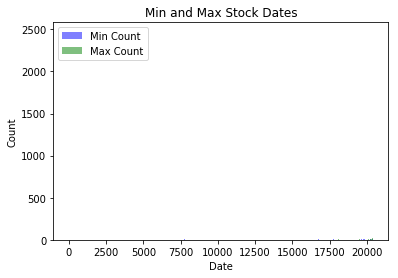

In [76]:
#Show bar chart per day of best invest and best close position for each stock
fig, ax = plt.subplots()
index = np.arange(len(min_max_df["Date"]))
bar_width = 0.35
opacity = 0.5
 
rects1 = plt.bar(index, min_max_df["Min Count"], 
                 alpha=opacity,
                 color='b',
                 label='Min Count')
 
rects2 = plt.bar(index + bar_width, min_max_df["Max Count"], 
                 alpha=opacity,
                 color='g',
                 label='Max Count')
 
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Min and Max Stock Dates')
#plt.xticks(index)
#plt.yticks(np.arange(0,31,1))
plt.legend()
 

plt.show()